In [82]:
import time
import numpy

import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
from matplotlib import pyplot

from sklearn.neighbors import KernelDensity

from scipy.stats import norm

_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
            "Le temps maximum permis est de {0:.4f} secondes, mais votre code a requis {1:.4f} secondes! ".format(maxduration,duration)+
            "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!")

# Définition de la fonction de densité de probabilité (PDF) de la densité-mélange
# Definition of the mixture model probability density function
def pdf(X):
    return 0.4 * norm(0, 1).pdf(X[:, 0]) + 0.6 * norm(5, 1).pdf(X[:, 0])

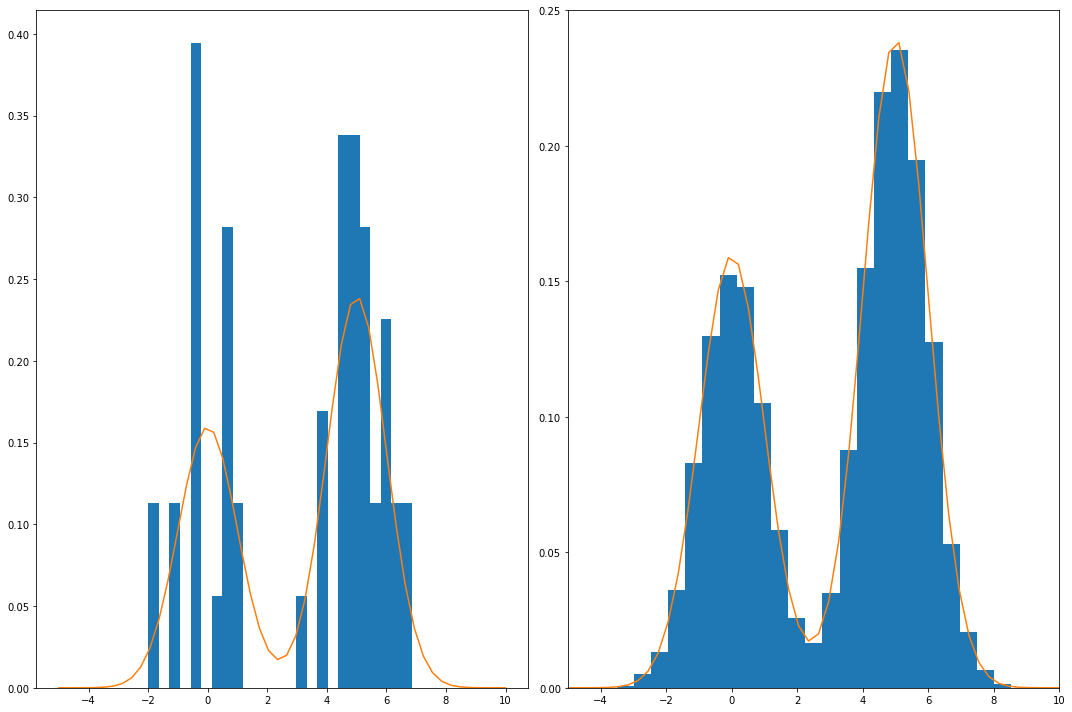

In [83]:
# Durée maximale d'exécution pour la question
# Maximum execution time for this question
TMAX_Q1A = 1.0

# *** TODO Q1A ***
# Complétez la fonction sample(n), qui génère n
# données suivant la distribution mentionnée dans l'énoncé
# Complete the function sample(n), which generates n
# instances according to the distribution mentioned in the statement
def sample(n):
    normal = numpy.random.normal
    X1 = normal(0, 1, int(0.4 * n))
    X2 = normal(5, 1, int(0.6 * n))
    X = numpy.concatenate((X1, X2))
    return X[:, numpy.newaxis]
# ******

_times.append(time.time())

# *** TODO Q1A ***
# Échantillonnez 50 et 10 000 données avec la fonction
# sample(n) que vous avez définie plus haut.
# Sample 50 and 10,000 instances with the sample(n) function
# that you defined above.
# ******
sample_1 = sample(50)
sample_2 = sample(10000)

# *** TODO Q1A ****
# Tracez l'histogramme de cette distribution échantillonnée pour
# 50 et 10 000 données, en utilisant 25 compartiments, dans le domaine [-5, 10].
# Sur les mêmes graphiques, tracez également la fonction de densité réelle.
# Plot the histogram of this sample distribution for 50 and 10,000 samples
# using 25 bins over the [-5, 10] domain.
# On these plots, display the real density function.
# ******
bins_width = 25

fig, subplot = pyplot.subplots(1, 2, tight_layout=True)

n, bins, patches = subplot[0].hist(sample_1, bins=bins_width, density=True)
x = numpy.linspace(-5, 10, len(sample_1))
y = x.reshape(len(x), 1)
subplot[0].plot(x, pdf(y))
n, bins_2, patches = subplot[1].hist(sample_2, bins=bins_width, density=True)
subplot[1].plot(x, pdf(y))

pyplot.xlim(-5, 10)

_times.append(time.time())
checkTime(TMAX_Q1A, "Q1A")
pyplot.show()

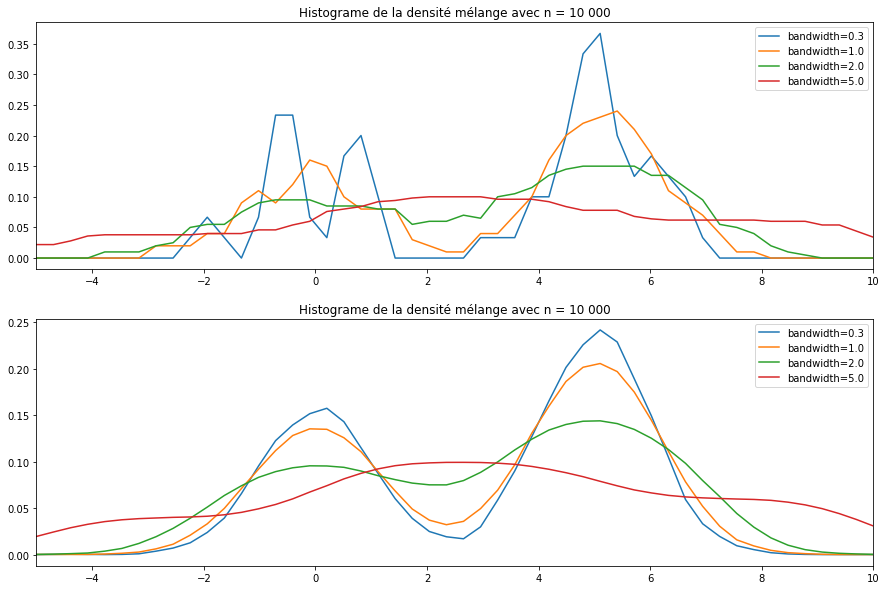

In [84]:
TMAX_Q1B = 2.5
_times.append(time.time())

# ** TODO Q1B ***
# À partir des échantillons 50 et 10 000 données de la question précédente
# faites une estimation de la distribution des données avec un noyau boxcar.
# Pour chaque taille de jeu (50 et 10 000), présentez les distributions
# estimées avec des tailles de noyau (bandwidth) de {0.3, 1, 2, 5}, dans
# la même figure, mais tracées avec des couleurs différentes.
# From the 50 and 10,000 data samples in the previous question
# make an estimate of the distribution of the data with a boxcar kernel.
# For each set size (50 and 10,000), present the distributions
# estimated with kernel sizes (bandwidth) of {0.3, 1, 2, 5}, in
# the same figure, but plotted with different colours.
# ******

bandwidths = [0.3, 1.0, 2.0, 5.0]

kermel_tophat_sample_1 = []
kermel_tophat_sample_2 = []

for bandwidth in bandwidths:
    k1 = KernelDensity(kernel='tophat', bandwidth=bandwidth)
    k1.fit(sample_1)
    k2 = KernelDensity(kernel='tophat', bandwidth=bandwidth)
    k2.fit(sample_2)
    kermel_tophat_sample_1.append(k1)
    kermel_tophat_sample_2.append(k2)

x = numpy.linspace(-5, 10, len(sample_1))[:, numpy.newaxis]

fig, subfig = pyplot.subplots(2, 1)

for i in range(2):
    kermels = kermel_tophat_sample_2
    label = 'Echantillions de N = 10000'
    if i == 0:
        kermels = kermel_tophat_sample_1
        label = 'Echantillions de N = 50'
    for index, kermel in enumerate(kermels):
        subfig[i].plot(x, numpy.exp(kermel.score_samples(x)), label=f'bandwidth={bandwidths[index]}')
    subfig[i].legend()
    subfig[i].set_xlim((-5,10))
    subfig[i].set_title("Histograme de la densité mélange avec n = 10 000")

# Affichage du graphique 
# Plot the graph
_times.append(time.time())
checkTime(TMAX_Q1B, "Q1B")
pyplot.show()